### Hierarchical Clustering and KMeans - Segmentation in Telecom Industry

In [1]:
#Import os, pandas and numpy
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data - Telco

In [2]:
os.chdir("C:\\Users\\Gourab\\Downloads")

In [3]:
telco = pd.read_csv("Telco.csv")

In [4]:
telco.sample(10)

,Calls,Intern,Text,Data,Age
580,2.66,0.33,283.63,2.23,30
338,5.24,1.11,18.51,2.19,50
655,4.67,1.19,17.24,1.92,47
27,4.51,1.05,18.65,2.30,46
120,0.88,0.24,23.62,0.23,58
975,1.32,0.11,593.15,2.87,14
744,2.62,0.10,21.14,0.48,30
155,2.07,0.12,23.89,0.52,35
879,3.54,0.26,281.89,2.02,35
439,1.03,0.70,38.17,2.92,57


## Scaling the Data

In [5]:
telco_scaled = telco.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [6]:
telco_scaled.head()

,Calls,Intern,Text,Data,Age
0,-0.996125,-0.569290,-0.940982,-1.299162,1.372936
1,-1.022513,-0.489795,-0.969806,-1.262765,1.002273
2,0.600387,-0.383802,0.303060,0.018380,-0.233271
3,-1.015916,-0.516293,-0.963302,-1.277324,1.434713
4,-1.048902,-0.436798,-0.957780,-1.284603,1.125827


In [8]:
telco_scaled.describe()

,Calls,Intern,Text,Data,Age
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.989964e-15,-2.852385e-15,1.069034e-15,-1.973387e-15,-2.446932e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.174248e+00,-8.342729e-01,-9.733149e-01,-1.306441e+00,-1.592368e+00
25%,-7.520297e-01,-7.812762e-01,-9.557213e-01,-1.051668e+00,-8.510422e-01
50%,-3.891861e-01,-4.897948e-01,-1.614142e-01,1.110083e-02,-1.714934e-01
75%,5.690510e-01,1.020609e+00,1.050073e+00,6.826104e-01,8.169412e-01
max,2.223288e+00,2.107040e+00,1.749616e+00,2.056566e+00,2.114262e+00


## Plotting a Dendrogram

In [8]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

**Study the functions:**

* dendrogram https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html 
* linkage    https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [9]:
Z = linkage(telco_scaled, 'complete')

In [ ]:
dendrogram(linkage(telco_scaled, 'complete'),leaf_rotation=90, leaf_font_size=5.)

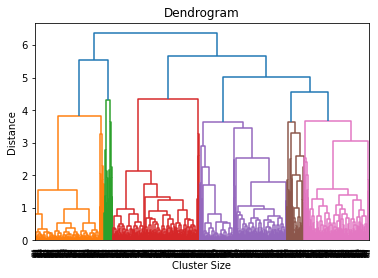

In [10]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=5.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

In [ ]:
#help(dendrogram)

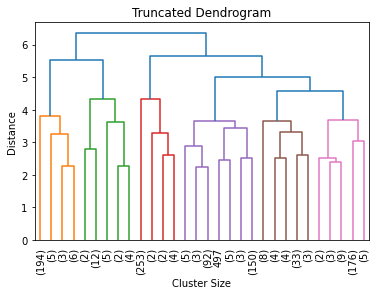

In [19]:
dendrogram(Z,truncate_mode='lastp',p=30,leaf_rotation=90, leaf_font_size=10.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

## Agglomerative Hierarchical Clustering

In [20]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [21]:
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [22]:
hclust.fit(telco_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

## Grouping the Data

In [24]:
telco['Groups'] = hclust.labels_

In [25]:
telco.head(10)

,Calls,Intern,Text,Data,Age,Groups
0,1.12,0.19,23.92,0.18,60,3
1,1.08,0.22,17.76,0.23,54,3
2,3.54,0.26,289.79,1.99,34,4
3,1.09,0.21,19.15,0.21,61,3
4,1.04,0.24,20.33,0.20,56,3
5,5.59,0.88,19.23,2.02,41,0
6,1.19,0.19,17.94,0.24,71,3
7,3.07,0.34,359.49,2.06,30,4
8,5.34,0.99,295.47,0.97,41,0
9,2.43,0.09,17.57,0.46,33,4


## Checking the Aggregate of the groups

In [36]:
telco.groupby(['Groups']).mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,4.472227,1.010486,82.832146,2.009190,43.149798
1,4.700400,0.432400,376.350800,1.545600,46.120000
2,1.763410,0.131456,507.732146,3.731073,19.003831
3,1.068846,0.238702,45.874567,0.355288,60.610577
4,2.800039,0.233514,204.993282,1.475405,32.424710


## K-Means Clustering

In [7]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=5, n_init=40)

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [13]:
#Fit the kmeans model
km.fit(telco_scaled)

KMeans(n_clusters=5, n_init=40)

In [15]:
#Cluster labels
#km.labels_

In [40]:
#Within Group SSE
km.inertia_

785.9308775068455

In [43]:
#Calculating the within group SSE for different cluster solutions
inertias = []
for k in [2,3,4,5,6,7]:
    km = KMeans(n_clusters=k,n_init=40)
    inertia = km.fit(telco_scaled).inertia_
    inertias.append(inertia)

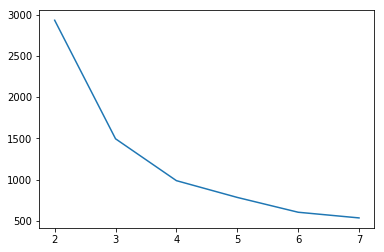

In [45]:
#Plotting the scree plot
plt.plot([2,3,4,5,6,7], inertias)
plt.show()

## Further Readings and References

http://research.stowers.org/mcm/efg/R/Visualization/cor-cluster/index.htm

https://datascience.stackexchange.com/questions/17927/categorical-data-in-kmeans


https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

Single Linkage Vs Complete Linkage
https://nlp.stanford.edu/IR-book/html/htmledition/single-link-and-complete-link-clustering-1.html